In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [2]:
# Generate a noisy signal
def generate_signal():
    # Clean signal: sum of two sine waves
    t = np.linspace(0, 1, 500)  # Time vector
    clean_signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 12 * t)
    
    # Add random noise
    noise = np.random.normal(0, 0.5, len(t))
    noisy_signal = clean_signal + noise
    
    return t, clean_signal, noisy_signal

In [3]:
# Apply a low-pass Butterworth filter
def apply_lowpass_filter(signal, cutoff_freq, fs):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(4, normal_cutoff, btype='low', analog=False)  # 4th order Butterworth filter
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

In [4]:
# Objective function for PSO
def objective_function(cutoff_freq, noisy_signal, clean_signal, fs):
    denoised_signal = apply_lowpass_filter(noisy_signal, cutoff_freq, fs)
    error = np.mean((denoised_signal - clean_signal) ** 2)  # Mean squared error
    return error

In [5]:
# PSO parameters
num_particles = 20       # Number of particles in the swarm
max_iterations = 50      # Maximum number of iterations
w = 0.7                  # Inertia weight
c1 = 1.5                 # Cognitive coefficient
c2 = 1.5                 # Social coefficient
search_space = [1, 20]   # Search space for cutoff frequency (in Hz)

In [6]:
# Initialize the swarm
positions = np.random.uniform(search_space[0], search_space[1], num_particles)
velocities = np.random.uniform(-1, 1, num_particles)

In [7]:
# Generate the noisy signal
t, clean_signal, noisy_signal = generate_signal()
fs = 500  # Sampling frequency (Hz)

In [8]:
# Initialize personal best positions and fitness values
p_best_positions = positions.copy()
p_best_fitness = np.array([objective_function(x, noisy_signal, clean_signal, fs) for x in positions])

In [9]:
# Initialize global best position and fitness value
g_best_position = p_best_positions[np.argmin(p_best_fitness)]
g_best_fitness = np.min(p_best_fitness)

In [10]:
# PSO algorithm
for iteration in range(max_iterations):
    for i in range(num_particles):
        # Update velocity
        r1, r2 = np.random.rand(), np.random.rand()
        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (p_best_positions[i] - positions[i]) +
                         c2 * r2 * (g_best_position - positions[i]))
        
        # Update position
        positions[i] += velocities[i]
        
        # Ensure the position stays within the search space
        positions[i] = np.clip(positions[i], search_space[0], search_space[1])
        
        # Evaluate fitness
        fitness = objective_function(positions[i], noisy_signal, clean_signal, fs)
        
        # Update personal best
        if fitness < p_best_fitness[i]:
            p_best_fitness[i] = fitness
            p_best_positions[i] = positions[i]
        
        # Update global best
        if fitness < g_best_fitness:
            g_best_fitness = fitness
            g_best_position = positions[i]
             # Print progress
    print(f"Iteration {iteration + 1}: Best Cutoff Frequency = {g_best_position:.2f} Hz, Best Fitness = {g_best_fitness:.6f}")


Iteration 1: Best Cutoff Frequency = 17.82 Hz, Best Fitness = 0.014846
Iteration 2: Best Cutoff Frequency = 18.09 Hz, Best Fitness = 0.014835
Iteration 3: Best Cutoff Frequency = 18.09 Hz, Best Fitness = 0.014835
Iteration 4: Best Cutoff Frequency = 18.05 Hz, Best Fitness = 0.014835
Iteration 5: Best Cutoff Frequency = 18.05 Hz, Best Fitness = 0.014835
Iteration 6: Best Cutoff Frequency = 18.05 Hz, Best Fitness = 0.014835
Iteration 7: Best Cutoff Frequency = 18.05 Hz, Best Fitness = 0.014835
Iteration 8: Best Cutoff Frequency = 18.05 Hz, Best Fitness = 0.014835
Iteration 9: Best Cutoff Frequency = 18.05 Hz, Best Fitness = 0.014835
Iteration 10: Best Cutoff Frequency = 18.05 Hz, Best Fitness = 0.014835
Iteration 11: Best Cutoff Frequency = 18.07 Hz, Best Fitness = 0.014835
Iteration 12: Best Cutoff Frequency = 18.06 Hz, Best Fitness = 0.014835
Iteration 13: Best Cutoff Frequency = 18.06 Hz, Best Fitness = 0.014835
Iteration 14: Best Cutoff Frequency = 18.06 Hz, Best Fitness = 0.014835
I

In [11]:
# Output the result
print("\nOptimization Complete:")
print(f"Optimal Cutoff Frequency: {g_best_position:.2f} Hz")


Optimization Complete:
Optimal Cutoff Frequency: 18.06 Hz


In [12]:
# Apply the optimal filter to the noisy signal
optimal_denoised_signal = apply_lowpass_filter(noisy_signal, g_best_position, fs)


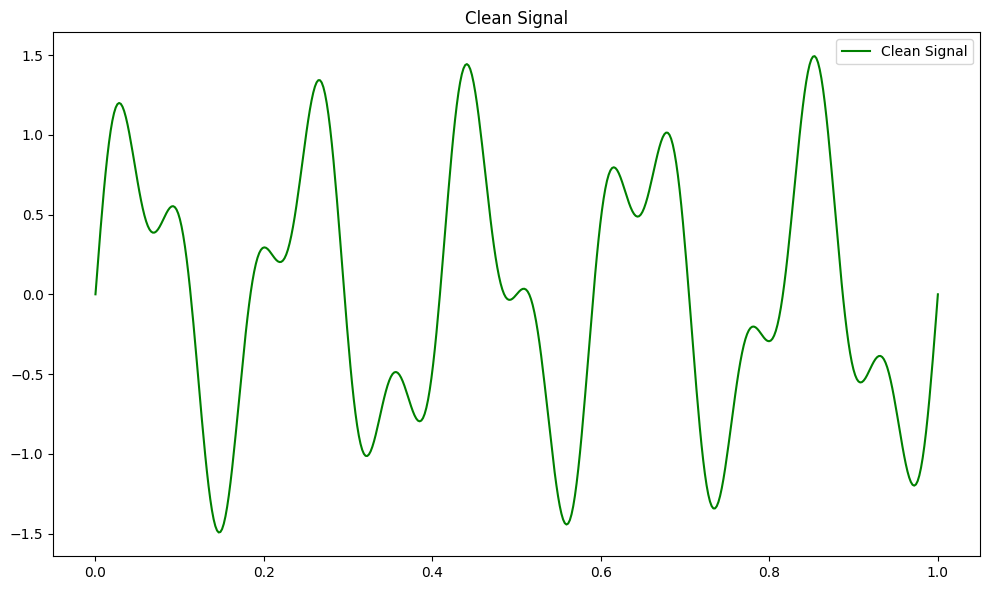

In [23]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, clean_signal, label="Clean Signal", color="green")
plt.title("Clean Signal")
plt.legend()
plt.tight_layout()
plt.show()

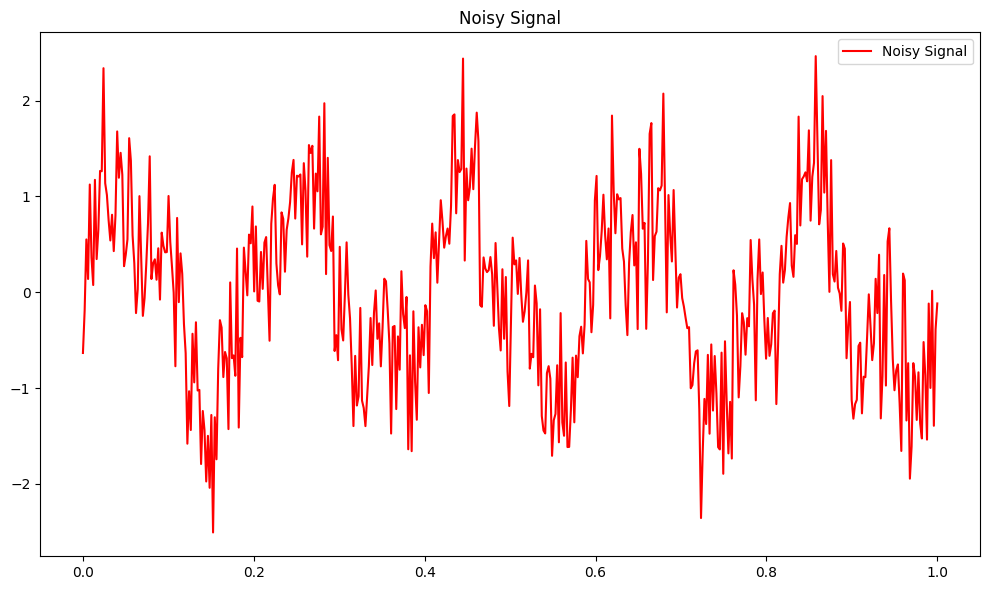

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(t, noisy_signal, label="Noisy Signal", color="red")
plt.title("Noisy Signal")
plt.legend()
plt.tight_layout()
plt.show()

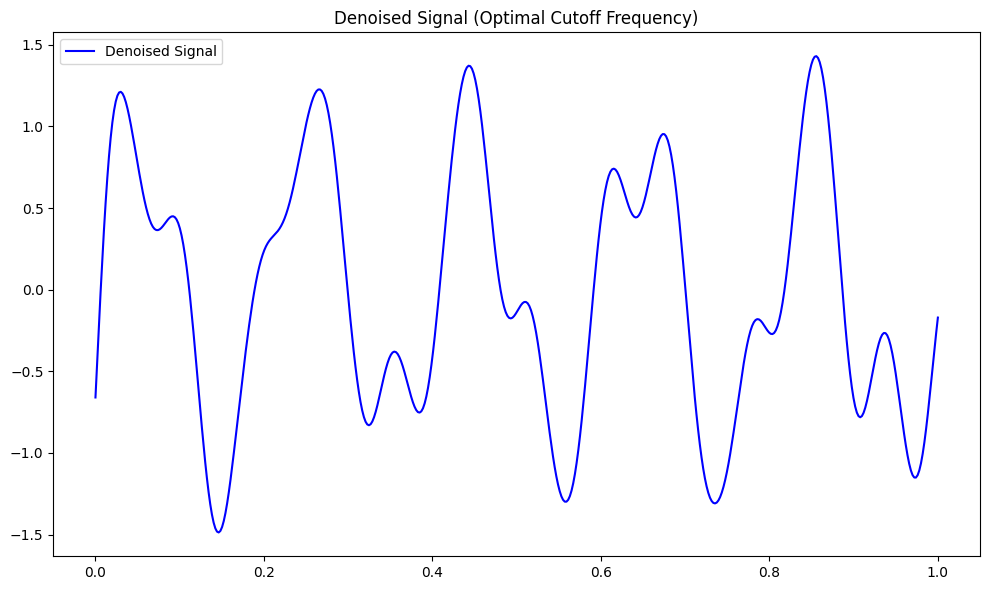

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(t, optimal_denoised_signal, label="Denoised Signal", color="blue")
plt.title("Denoised Signal (Optimal Cutoff Frequency)")
plt.legend()
plt.tight_layout()
plt.show()